<a id = "1"></a><br>
# Load Python Pakages


### 1. **AutoML** (Automated Machine Learning)

**AutoML** se refiere a un conjunto de herramientas y técnicas diseñadas para automatizar el proceso de construcción de modelos de Machine Learning. El objetivo principal de AutoML es reducir la intervención manual y facilitar el desarrollo de modelos de machine learning incluso a quienes no tienen mucha experiencia en el ajuste y selección de modelos.

#### ¿Para qué sirve AutoML?
AutoML automatiza varias etapas del flujo de trabajo de machine learning, como:
- **Selección de modelos**: Elige el mejor algoritmo o modelo para el conjunto de datos.
- **Optimización de hiperparámetros**: Busca automáticamente los mejores valores para parámetros como `learning_rate`, `n_estimators`, etc.
- **Preprocesamiento**: Aplica automáticamente técnicas de preprocesamiento como la normalización o el manejo de valores nulos.
- **Validación y evaluación**: Automáticamente divide los datos para entrenar y validar el modelo, aplicando técnicas como validación cruzada.

Esto lo hace útil para:
- **Ingenieros de datos y científicos de datos que quieren prototipar modelos rápidamente**.
- **Empresas que desean implementar modelos de ML sin un equipo especializado**.

Ejemplos de plataformas AutoML:
- **Google Cloud AutoML**: Ofrecido como servicio en Google Cloud para clasificación, detección de imágenes, y más.
- **Auto-sklearn**: Una extensión de scikit-learn que automatiza la selección de modelos y la optimización de hiperparámetros.

### 2. **sklego** (Scikit-learn Extra Goodies)

**sklego** es una biblioteca complementaria a **scikit-learn** que proporciona herramientas adicionales y útiles para el desarrollo de modelos de machine learning. Está orientada a extender la funcionalidad de scikit-learn, añadiendo utilidades y características que no están incluidas de manera nativa.

#### ¿Para qué sirve sklego?
- **Funciones adicionales para el preprocesamiento**: sklego incluye transformadores avanzados, como codificadores de features categóricas específicos para el machine learning.
- **Validaciones adicionales**: Ofrece validadores personalizados para tareas como la validación de modelos que deben cumplir con restricciones adicionales.
- **Modelos personalizados**: sklego incluye modelos adicionales, como el **FairClassifier**, que ayuda a mitigar sesgos durante el entrenamiento.
  
En resumen, **sklego** es útil si ya trabajas con **scikit-learn** y necesitas funciones adicionales como manejo de bias en modelos, transformadores personalizados, o métodos avanzados de validación.

### 3. **FLAML** (Fast and Lightweight AutoML)

**FLAML** es una biblioteca de **AutoML** enfocada en la eficiencia, tanto en términos de tiempo como de recursos computacionales. Está diseñada para encontrar modelos de machine learning precisos sin la necesidad de usar mucha potencia de cálculo o tiempo, y se centra principalmente en tareas de **clasificación, regresión y series temporales**.

#### ¿Para qué sirve FLAML?
- **Rápida optimización de hiperparámetros**: FLAML está optimizado para ser rápido y ligero, lo que lo hace ideal para proyectos con limitaciones de recursos o tiempo.
- **Menor uso de recursos**: A diferencia de otros enfoques de AutoML, FLAML está diseñado para ser **ligero** en términos de memoria y procesamiento, por lo que es ideal para trabajar en máquinas con menos potencia (como laptops o máquinas virtuales de menor capacidad).
- **Adaptación a distintos tipos de tareas**: FLAML puede ser usado tanto para tareas tradicionales como para problemas de series temporales, optimizando el proceso de búsqueda de modelos y ajustando los hiperparámetros.

En comparación con otras soluciones de AutoML, **FLAML** sobresale en:
- **Velocidad**: Encuentra buenos modelos rápidamente.
- **Eficiencia computacional**: Consume menos recursos, lo que lo hace ideal para grandes datasets o ambientes con recursos limitados.

### Comparación de las herramientas:

| Herramienta | Propósito | Usos Principales | Ventajas |
|-------------|-----------|------------------|----------|
| **AutoML** | Automatización del pipeline completo de ML | Prototipado rápido, empresas con poca experiencia en ML | Automatización de todo el flujo de trabajo (modelo, hiperparámetros, preprocesamiento) |
| **sklego** | Complemento para scikit-learn | Extender funcionalidad de scikit-learn (preprocesamiento, validación, fairness) | Añade características no nativas, útiles para tareas específicas |
| **FLAML** | AutoML ligero y eficiente | Modelos rápidos y eficientes para clasificación, regresión, series temporales | Optimizado para ser rápido y con bajo uso de recursos |

### ¿Cuál deberías usar?
- Si necesitas **automatizar completamente el flujo de trabajo de machine learning**, puedes optar por **AutoML** (como Auto-sklearn, Google AutoML).
- Si ya estás utilizando **scikit-learn** y necesitas extensiones adicionales o trabajar en fairness o preprocesamiento avanzado, **sklego** es una excelente opción.
- Si buscas un **AutoML rápido y ligero**, especialmente cuando tienes limitaciones de tiempo o recursos computacionales, **FLAML** sería ideal.

Cada herramienta tiene un propósito y fortalezas particulares según tus necesidades y el entorno en el que trabajes.

Usare el modelo `LADRegression` del paquete `sklego` este modelo implementa la **regresión de los mínimos desvíos absolutos (LAD, por sus siglas en inglés)**. A diferencia de la regresión lineal ordinaria que minimiza los errores cuadrados (RSS, Residual Sum of Squares), la LAD minimiza la **suma de los valores absolutos de los errores**.

>> Por que ?

1. **Robustez a outliers**: A diferencia de la regresión lineal ordinaria, que es sensible a valores atípicos (outliers) debido al uso del error cuadrático, la LAD es más resistente. Minimiza la suma de los errores absolutos, lo que reduce la influencia de los outliers en el ajuste del modelo.
  
2. **Distribución de los errores**: Si se espera que los errores en los datos tengan una distribución simétrica pero con colas largas o sean asimétricos, la LAD puede ser más apropiada, ya que se centra en la mediana de los errores en lugar de la media.

3. **Aplicaciones específicas**: Algunos problemas en finanzas o economía, donde los valores extremos son comunes y no se quiere que estos dominen el ajuste del modelo, podrían beneficiarse de la LAD.


<font color = 'blue'>
Content: 


1. [Load Python Pakages and Data](#1)
2. [First look to data](#2)
3. [Exploratory Data Analysis](#3)   
4. [Feature Engineering](#4)   
5. [Preprocesing](#5)
   * [A custom pipeline for Feature Engineering](#7)
6. [Putting pieces together](#8)
9. [Submission](#13)



In [1]:
#basics
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

import warnings
warnings.filterwarnings("ignore")


#preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform


#statistics
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import randint

#feature engineering
from sklearn.feature_selection import mutual_info_regression


#transformers and pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config


#algorithms
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


#model evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


#stacking
from sklearn.ensemble import StackingRegressor




<a id = "2"></a><br>
#  First look to data

In [2]:
# Read the data
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv', index_col=[0])
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv', index_col=[0])
original = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')
sample_submission = pd.read_csv("/kaggle/input/playground-series-s3e16/sample_submission.csv")

# reserved for pipeline
pipe_data = train.copy()
pipe_test = test.copy()
pipe_original = original.copy()

# use for preliminary analysis
train_df = train.copy()
test_df = test.copy()
original_df = original.copy()
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
test_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [4]:
original_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
original_df.index.names = ['id']
original_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [6]:
train_df = pd.concat([train_df, original_df])
train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [7]:
# is there any missing value?
train_df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Weight            False
Shucked Weight    False
Viscera Weight    False
Shell Weight      False
Age               False
dtype: bool

## Descpriptive statistics

In [8]:
#numerical feature descriptive statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,77944.0,1.317153,0.288404,0.187500,1.150000,1.375000,1.537500,2.037500
Diameter,77944.0,1.024316,0.237949,0.137500,0.887500,1.075000,1.200000,1.625000
Height,77944.0,0.348154,0.092723,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,77944.0,23.394310,12.713088,0.056699,13.395139,23.728531,32.162508,80.101512
Shucked Weight,77944.0,10.109418,5.652666,0.028349,5.712424,9.879801,14.047177,42.184056
Viscera Weight,77944.0,5.062290,2.809131,0.014175,2.849125,4.975337,7.002326,21.545620
Shell Weight,77944.0,6.727465,3.603159,0.042524,3.940580,6.874754,9.086015,28.491248
Age,77944.0,9.967156,3.177472,1.000000,8.000000,10.000000,11.000000,29.000000


## Grouping features for preprocessing purposes

In [9]:
train_df.nunique().sort_values()

Sex                  3
Age                 28
Height              65
Diameter           123
Length             146
Viscera Weight     970
Shell Weight      1050
Shucked Weight    1769
Weight            3099
dtype: int64

In [10]:
# Just bookkeeping
feature_list = [feature for feature in train_df.columns if not feature  == "Age"]
categorical_features= ['Sex']
numerical_features = list(set(feature_list) - set(categorical_features))

assert feature_list.sort() == (numerical_features + categorical_features).sort()

<a id = "3"></a><br>
# Exploratory Data Analysis

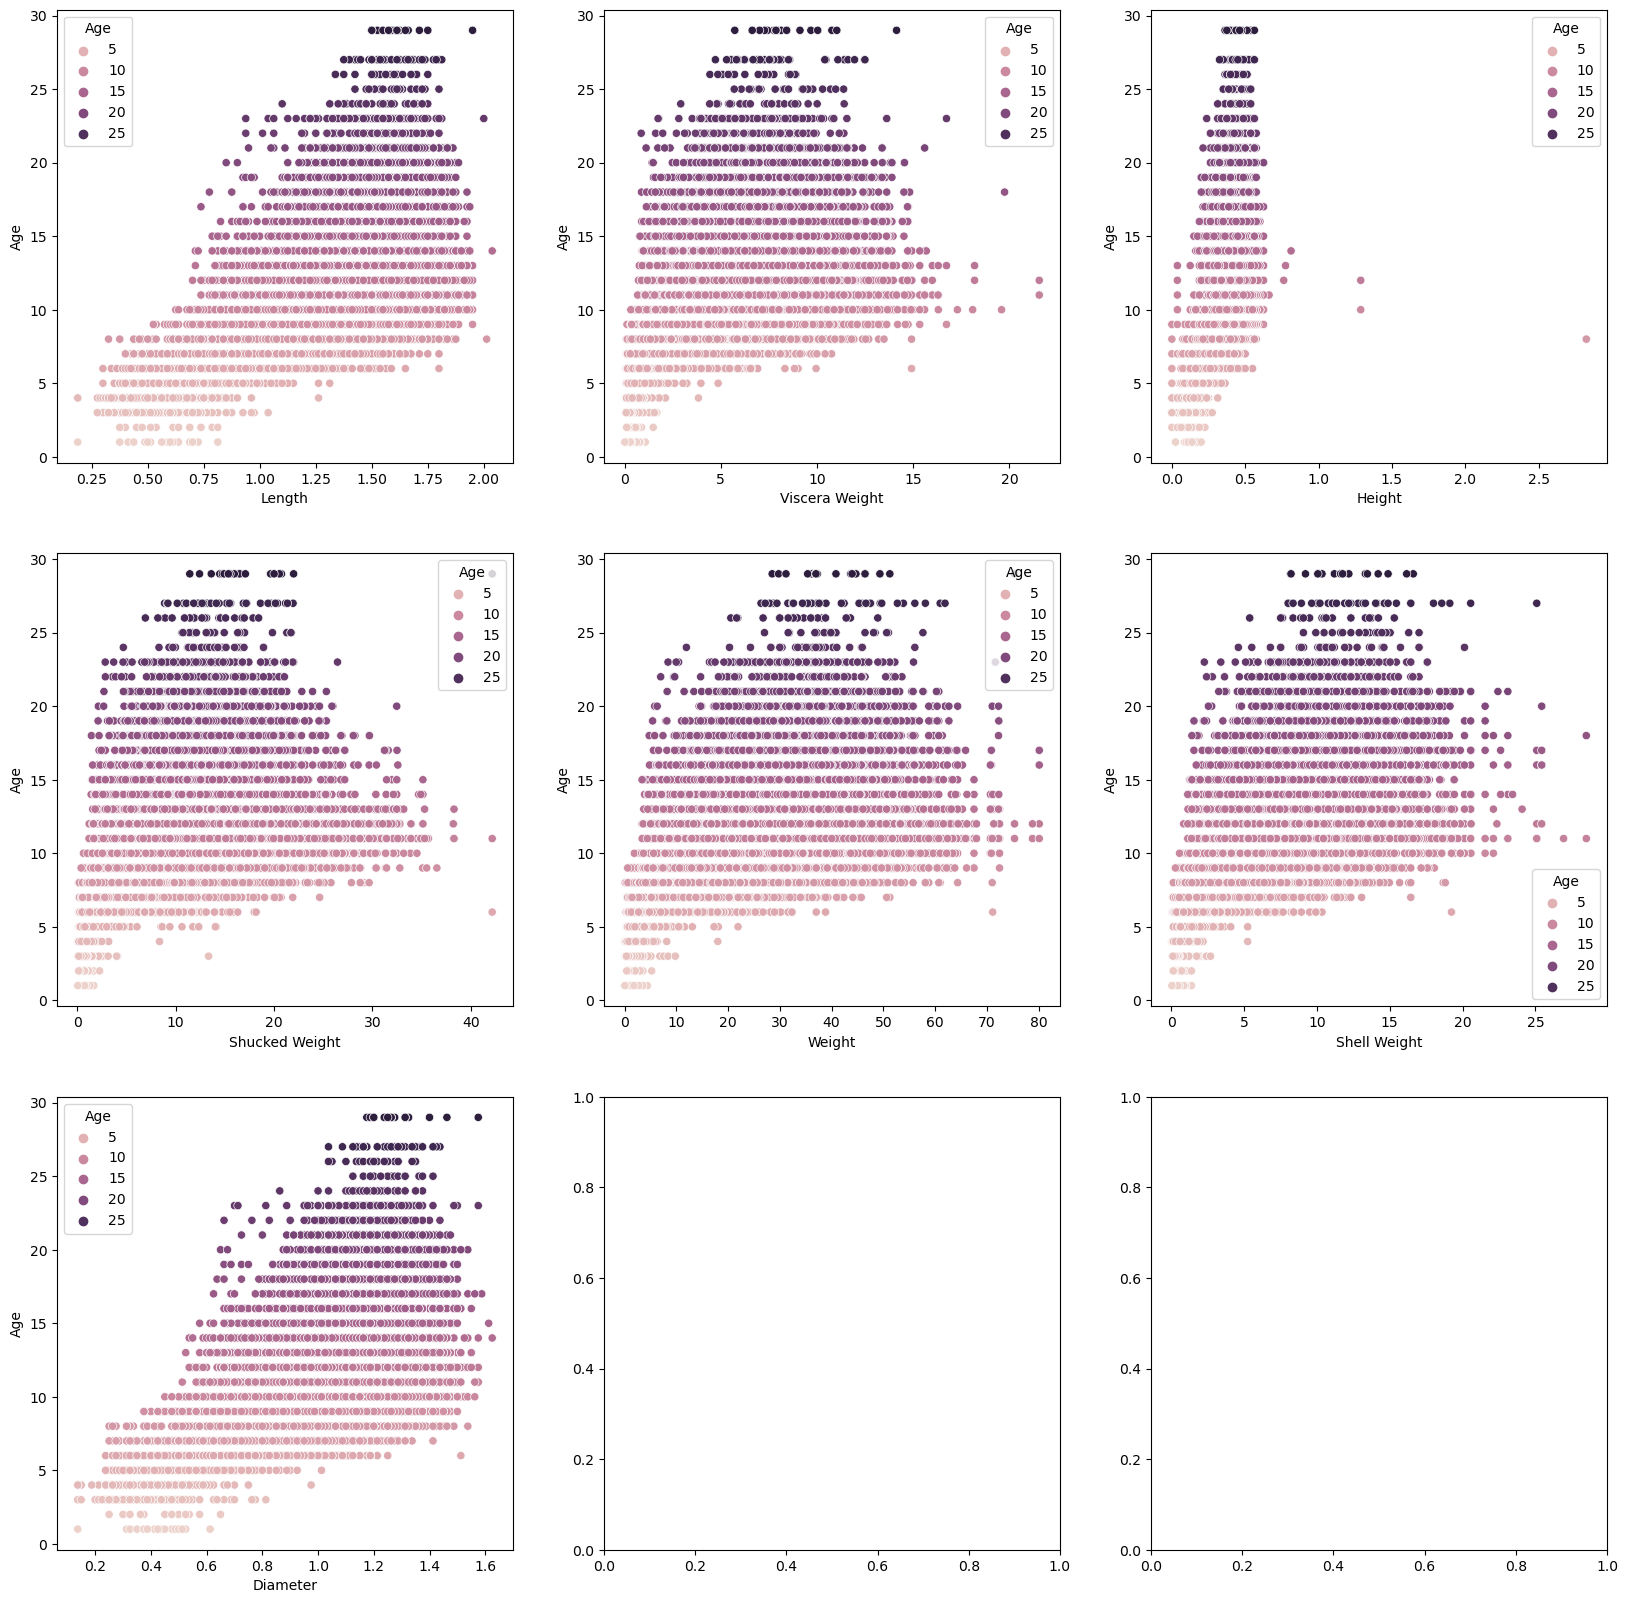

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='Age',  data=train_df, ax=subplot, hue = 'Age' )
    

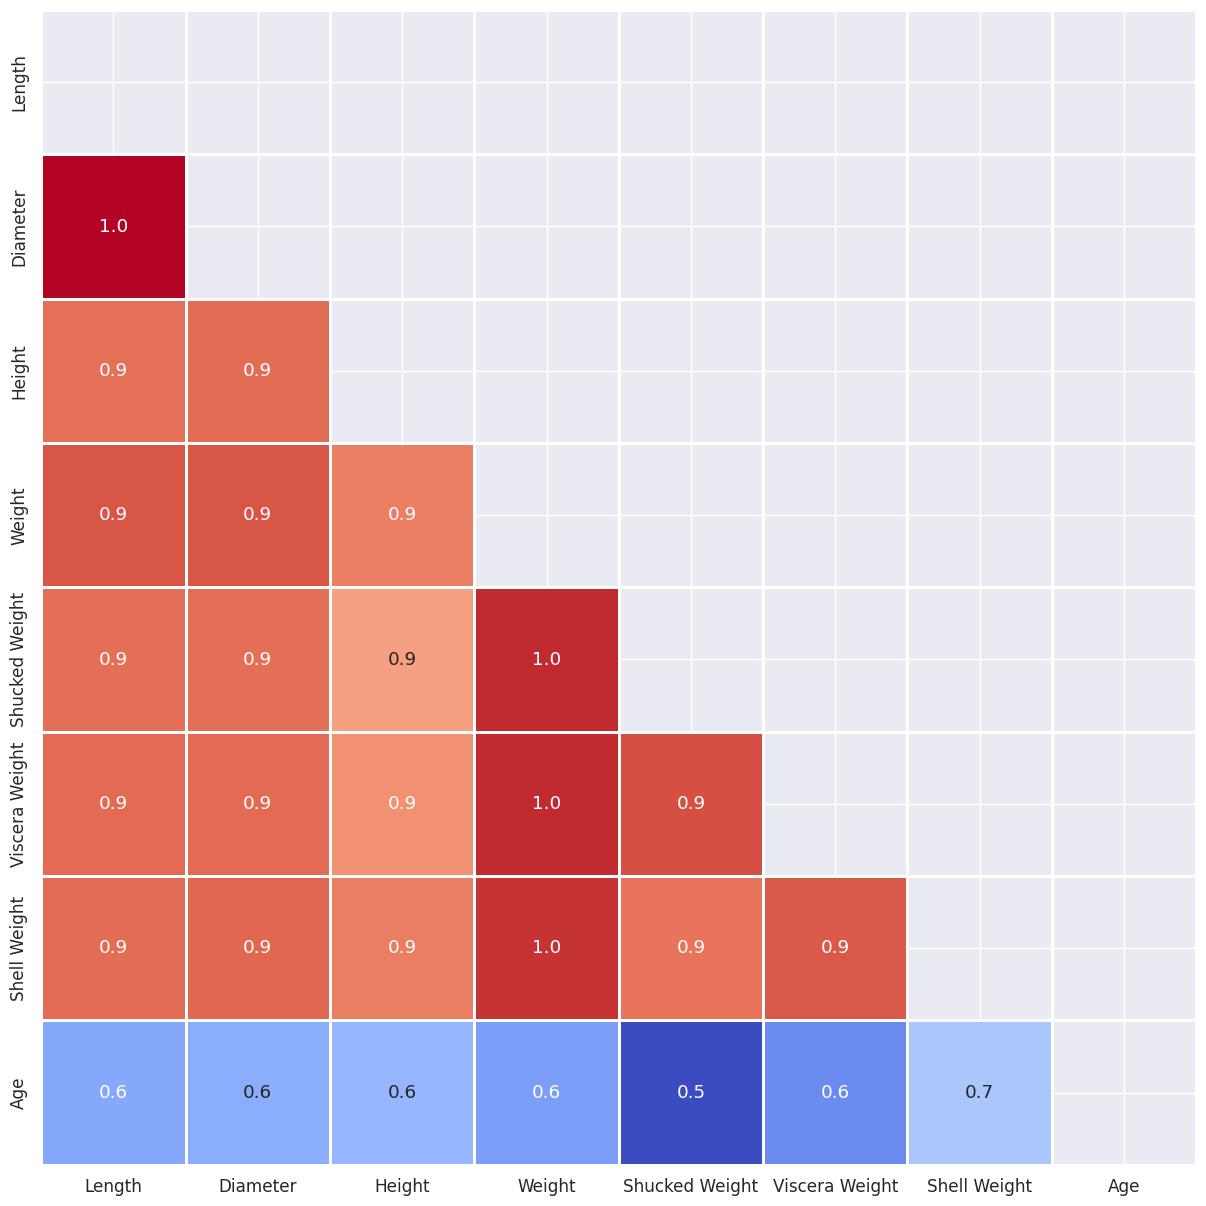

In [12]:
# Display correlations between features and Age on heatmap.

sns.set(font_scale=1.1)
correlation_train = train_df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False);

In [13]:
y= train_df['Age']

In [14]:
# determine the mutual information for numerical features
mutual_df = train_df[numerical_features]

mutual_info = mutual_info_regression(mutual_df, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["MI_score"] ).style.background_gradient("cool")


,MI_score
Shell Weight,0.561187
Weight,0.504793
Height,0.487750
Viscera Weight,0.477096
Diameter,0.476389
Length,0.473696
Shucked Weight,0.447613


In [15]:
#categorical features must be encoded to get mutual information
mutual_df_categorical = train_df[categorical_features]
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
mutual_info = mutual_info_regression(mutual_df_categorical, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

,Categorical_Feature_MI
Sex,0.244074


<a id = "4"></a><br>
# Feature Engineering

In [16]:
train_df ["volume"] = train_df["Height"] * train_df["Diameter"] * train_df["Length"]
train_df ["dim1"] = train_df["Height"] * train_df["Diameter"] 
train_df ["dim2"] = train_df["Height"] * train_df["Length"] 
train_df ["dim3"] = train_df["Diameter"] * train_df["Length"]
train_df ["total_weight"] = train_df["Shell Weight"] + train_df["Viscera Weight"] + train_df["Shucked Weight"]
train_df ["weight_volume_ratio"] = train_df["Weight"] / (train_df["Diameter"] + 1e-8 )
train_df ["shell_to_total_weight"] = train_df["Shell Weight"] / train_df["Weight"]
train_df ["viscera_to_total_weight"] = train_df["Viscera Weight"] / train_df["Weight"]
train_df ["shucked_to_total_weight"] = train_df["Shucked Weight"] / train_df["Weight"]




new_features = ["volume", 'dim1', 'dim2', 'dim3', 'total_weight', 'weight_volume_ratio', 'shell_to_total_weight','viscera_to_total_weight','shucked_to_total_weight']


Let's check new features mutual information scores...

In [17]:
mutual_df = train_df[new_features]

mutual_info = mutual_info_regression(mutual_df, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["New_Feature_MI"] ).style.background_gradient("cool")

,New_Feature_MI
dim1,0.512459
dim2,0.510090
volume,0.509246
weight_volume_ratio,0.494219
dim3,0.488536
total_weight,0.476709
shucked_to_total_weight,0.229111
shell_to_total_weight,0.210416
viscera_to_total_weight,0.152984


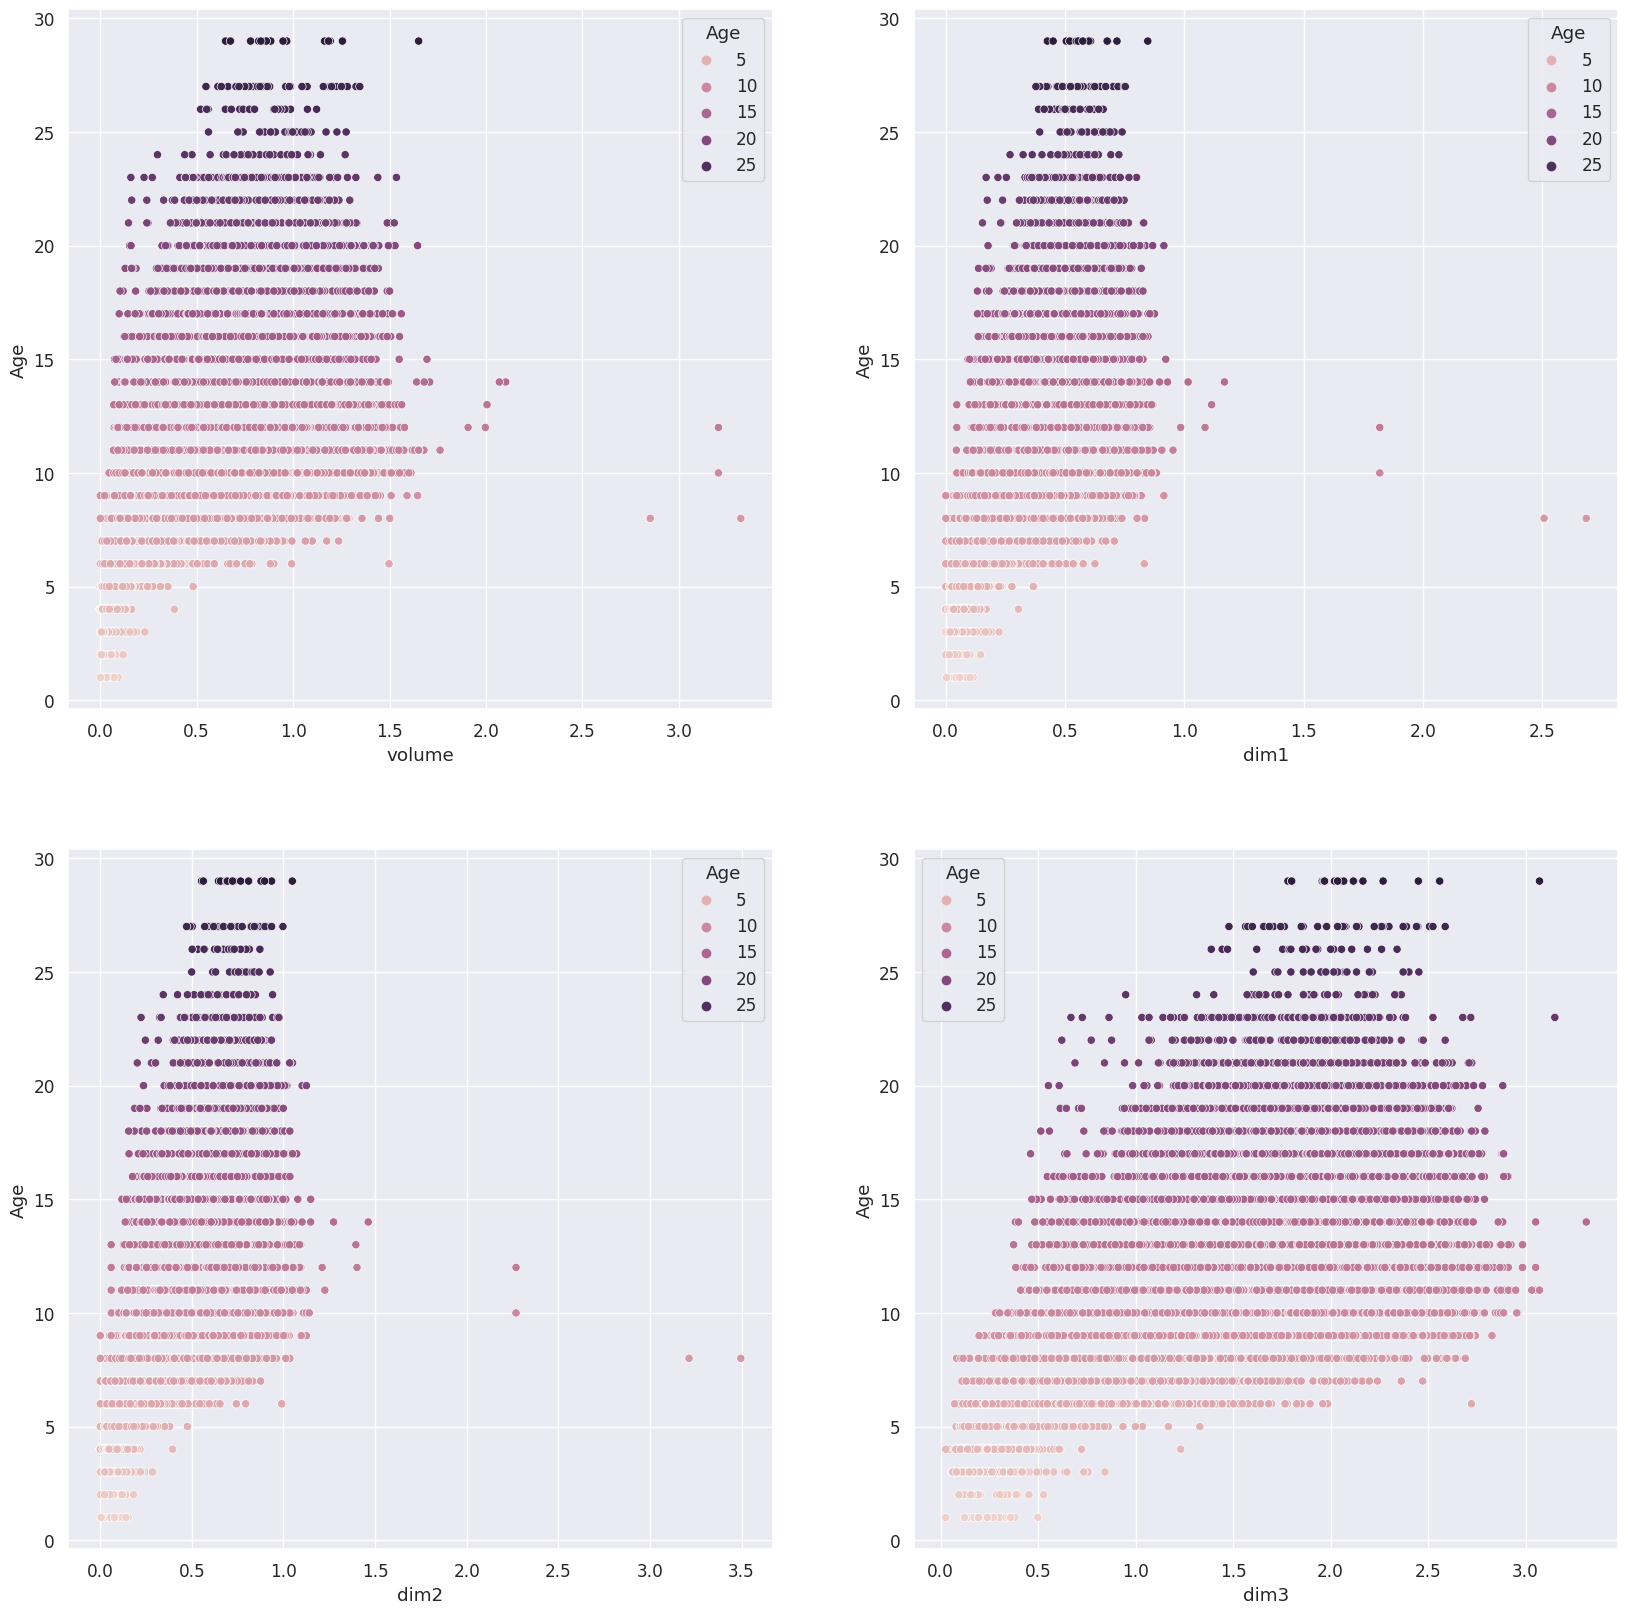

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for var, subplot in zip(new_features, ax.flatten()):
    sns.scatterplot(x=var, y='Age',  data=train_df, ax=subplot, hue = 'Age')

In [19]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
#tree preprocessor
tree_preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('categorical_transformer', categorical_transformer, categorical_features)

    ])

tree_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical_transformer',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex'])])

<a id = "7"></a><br>
## A custom pipeline for Feature Engineering

In [21]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):
        
        self.add_attributes = add_attributes
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        
        if self.add_attributes:
            X_copy = X.copy()
            
            
            X_copy ["volume"] = X_copy["Height"] * X_copy["Diameter"] * X_copy["Length"]
            X_copy ["dim1"] = X_copy["Height"] * X_copy["Diameter"] 
            X_copy ["dim2"] = X_copy["Height"] * X_copy["Length"] 
            X_copy ["dim3"] = X_copy["Diameter"] * X_copy["Length"]
            X_copy ["total_weight"] = X_copy["Shell Weight"] + X_copy["Viscera Weight"] + X_copy["Shucked Weight"]
            X_copy ["weight_volume_ratio"] = X_copy["Weight"] / (X_copy["Diameter"] + 1e-8 )
            X_copy ["shell_to_total_weight"] = X_copy["Shell Weight"] / X_copy["Weight"]
            X_copy ["viscera_to_total_weight"] = X_copy["Viscera Weight"] / X_copy["Weight"]
            X_copy ["shucked_to_total_weight"] = X_copy["Shucked Weight"] / X_copy["Weight"]
            
            return X_copy
        else:
            return X_copy

In [22]:
Creator = FeatureCreator(add_attributes = True)

<a id = "8"></a><br>
# Putting pieces together

In [23]:
pipe_original.index.names = ['id']
pipe_original.head()


pipe_data = pd.concat([pipe_data, pipe_original])
pipe_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 77944 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.9+ MB


In [24]:
y = pipe_data['Age']
pipe_data = pipe_data.drop('Age', axis=1)
pipe_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395


In [25]:
pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
#flaml
from flaml import AutoML

In [27]:
pip install sklego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklego.linear_model import LADRegression

In [29]:
automl = AutoML()

automl_pipeline = Pipeline([
    ('Creator', Creator),
    ('tree_preprocessor', tree_preprocessor),
    ("automl", automl)
])
automl_pipeline

Pipeline(steps=[('Creator', FeatureCreator()),
                ('tree_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex'])])),
                ('automl',
                 AutoML(append_log=False, auto_augment=True, custom_hp={},
                        cv_score_agg_func=None, early_stop=False,
                        ensemble=False, e...
                        keep_search_state=False, learner_selector='sample',
                        log_file_name='', log_training_metric=False,
                        log_type='better', max_iter=None, mem_thres=4294967296,
                        metric='auto', metric_constraints=[],
                        min_sample_size=10000, mlflow_logging=True,
                        model_history=False, n_concurrent_trials=1, n_jobs=-1,
                        n_splits=5, pred_time_limit=inf,
                        preserve_checkpoint=True, retrain_full=True, ...))])

In [30]:
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 10800,  # total running time in seconds
    "task": 'regression',  # task type
    "seed": 24545678,  # random seed
    "metric" : 'mae',
    "eval_method" : 'cv',
    "n_splits" : 5,
    "ensemble" : True,
        "ensemble": {
        "final_estimator": LADRegression(),
        "passthrough": True,
    },

    
}

pipeline_settings = {f"automl__{key}": value for key, value in automl_settings.items()}

In [31]:
automl_pipeline = automl_pipeline.fit(pipe_data, y, **pipeline_settings)

[flaml.automl.logger: 06-04 22:06:31] {1693} INFO - task = regression
[flaml.automl.logger: 06-04 22:06:31] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 06-04 22:06:31] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 06-04 22:06:31] {1801} INFO - Minimizing error metric: mae
[flaml.automl.logger: 06-04 22:06:31] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 06-04 22:06:31] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-04 22:06:32] {2347} INFO - Estimated sufficient time budget=7095s. Estimated necessary time budget=61s.
[flaml.automl.logger: 06-04 22:06:32] {2394} INFO -  at 0.7s,	estimator lgbm's best error=1.9874,	best estimator lgbm's best error=1.9874
[flaml.automl.logger: 06-04 22:06:32] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-04 22:06:33] {2394} INFO -  at 1.4s,	estimator lgbm's best error=1.9874,	be

In [32]:
preds_test =  automl_pipeline.predict(pipe_test)

In [33]:
preds_test = [round(x) for x in preds_test]

<a id = "13"></a><br>
# Submission

In [34]:
output = pd.DataFrame({'id': pipe_test.index,
                       'Age': preds_test})
output.to_csv('submission.csv', index=False)

In [35]:
output.head()

,id,Age
0,74051,7
1,74052,8
2,74053,11
3,74054,9
4,74055,7
